# 10 Step Phase Shifting Technique

In [2]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from functions import mask_circ_img, load_raw_img, rad_to_deg

### Load the 10 images

In [3]:
base_path = "ten-step-images-2/"
file_type = ".CR2"

file_names = os.listdir(base_path)

imgs = []

for file_name in file_names:
    imgs.append(load_raw_img(base_path + file_name)[:,:,1] / 10)

In [4]:
alphas = rad_to_deg(np.array([
    np.pi / 2, 
    5*np.pi/8, 
    3*np.pi/4, 
    7*np.pi/8, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2
]))

betas = rad_to_deg(np.array([
    0,
    np.pi/8,
    np.pi/4,
    3*np.pi/8,
    np.pi/2,
    0,
    0,
    np.pi/4,
    0,
    np.pi/2
]))

for i in range(len(alphas)):
    print(f'Alpha: {alphas[i]}, Beta: {betas[i]}')

Alpha: 90.0, Beta: 0.0
Alpha: 112.5, Beta: 22.5
Alpha: 135.0, Beta: 45.0
Alpha: 157.5, Beta: 67.5
Alpha: 90.0, Beta: 90.0
Alpha: 90.0, Beta: 0.0
Alpha: 90.0, Beta: 0.0
Alpha: 90.0, Beta: 45.0
Alpha: 90.0, Beta: 0.0
Alpha: 90.0, Beta: 90.0


Define center and radius for masking

In [5]:
center = (3050, 1880)
radius = 1470

### Calculate the isoclinic parameter
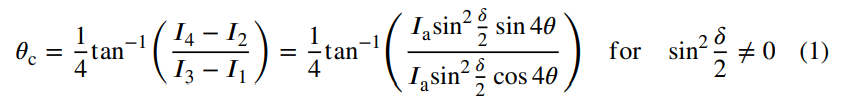

In [6]:
def generate_isoclinic_param(
        img_1: np.ndarray, 
        img_2: np.ndarray, 
        img_3: np.ndarray, 
        img_4: np.ndarray
) -> np.ndarray:
    """
    Images should be in order defined by Ramesh et al. 
    Returns the isoclinic parameter
    """
    return 1/4 * np.arctan2((img_4 - img_2),(img_3 - img_1))

In [7]:
isoclinic_param = generate_isoclinic_param(imgs[0], imgs[1], imgs[2], imgs[3])

0.7853981633974483
-0.7844177762662583


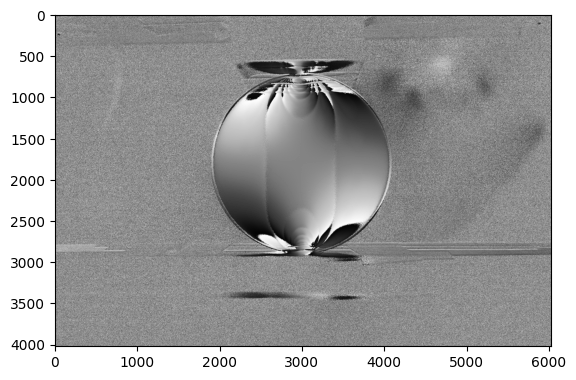

In [10]:
plt.imshow(isoclinic_param, cmap='gray')

248 199
0 2
50000 642
100000 879
150000 1064
200000 1217
250000 1349
300000 1468
350000 1574
400000 1670
450000 1759
500000 1843
550000 1921
600000 1992
650000 2059
700000 2122
750000 2182
800000 2235
850000 2285
900000 2339
950000 2389
1000000 2437
1050000 2484
1100000 2528
1150000 2569
1200000 2609
1250000 2646
1300000 2678
1350000 2709
1400000 2735
1450000 2769
1500000 2807
1550000 2844
1600000 2880
1650000 2913
1700000 2948
1750000 2980
1800000 3011
1850000 3043
1900000 3075
1950000 3103
2000000 3134
2050000 3162
2100000 3192
2150000 3218
2200000 3246
2250000 3272
2300000 3297
2350000 3321
2400000 3346
2450000 3371
2500000 3395
2550000 3418
2600000 3441
2650000 3462
2700000 2125
2750000 2064
2800000 2002
2850000 1935
2900000 1864
2950000 1791
3000000 1712
3050000 1627
3100000 1536
3150000 1437
3200000 1328
3250000 1204
3300000 1063
3350000 892
3400000 666
3450000 243


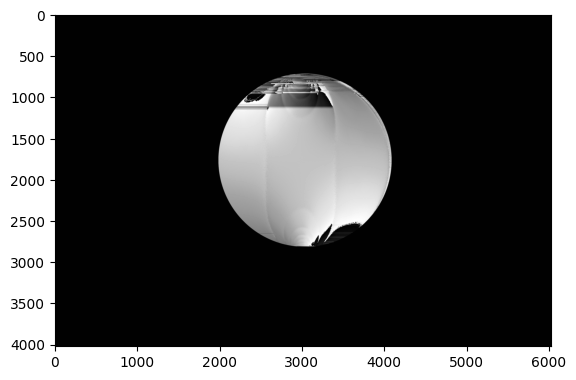

In [11]:
plt.imsave('isoclinic.jpg', isoclinic_param, cmap='gray')   

### Generate isochromatic parameter
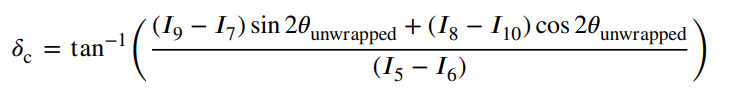


In [12]:
def generate_isochromatic_param(
    img_5: np.ndarray,
    img_6: np.ndarray,
    img_7: np.ndarray,
    img_8: np.ndarray,
    img_9: np.ndarray,
    img_10: np.ndarray,
    isoclinic_param: np.ndarray
) -> np.ndarray:
    return np.arctan(((img_9 - img_7)*np.sin(2*isoclinic_param) + 
                      (img_8 - img_10)*np.cos(2*isoclinic_param))/(img_5 - img_6))

In [13]:
isochromatic_param_rad = np.nan_to_num(generate_isochromatic_param(
    imgs[4],
    imgs[5],
    imgs[6],
    imgs[7],
    imgs[8],
    imgs[9],
    isoclinic_param
))

C:\Users\Zebedee\AppData\Local\Temp\ipykernel_14864\3016659149.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(((img_9 - img_7)*np.sin(2*isoclinic_param) +
C:\Users\Zebedee\AppData\Local\Temp\ipykernel_14864\3016659149.py:10: RuntimeWarning: invalid value encountered in divide
  return np.arctan(((img_9 - img_7)*np.sin(2*isoclinic_param) +


Translate `isochromatic_param` values from `(-pi/2, pi/2)` to `(0, 255)`

In [14]:
isochromatic_param = (isochromatic_param_rad + np.pi/2)*255/(np.pi)

In [13]:
# plt.imsave('isochromatic.jpg', isochromatic_param, cmap='gray')

## Isochromatic Image Processing

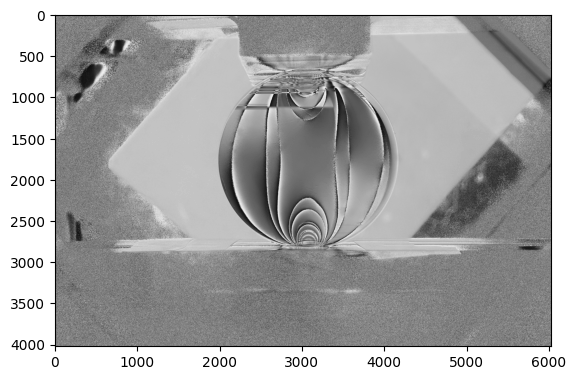

In [15]:
plt.imshow(isochromatic_param, cmap='gray')

In [44]:
# Save the image so we can load it back in - hacky fix, bug in masking function
filename = 'isochromatic_temp.jpg'
plt.imsave(filename, isochromatic_param, cmap='gray')

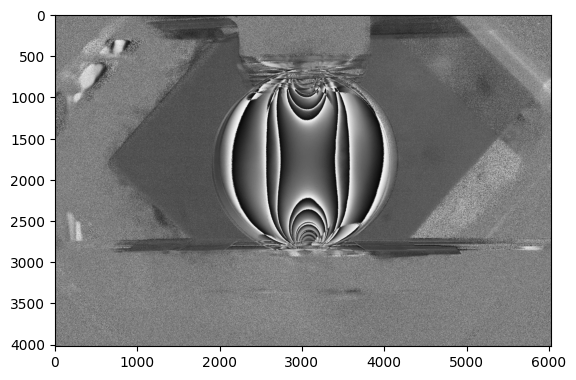

In [46]:
# Load the image back in
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

Smooth the image

In [47]:
img_smooth = cv.medianBlur(img, 15)

Mask the image

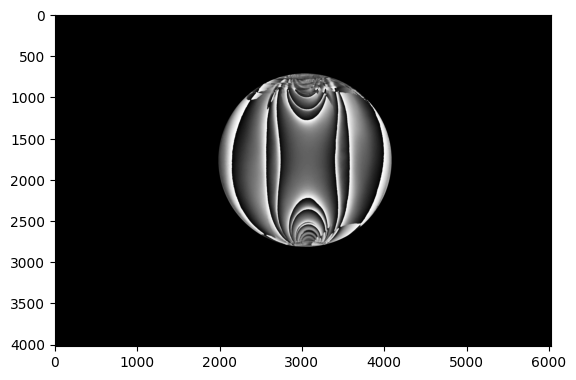

In [48]:
# Mask
img_masked = mask_circ_img(img_smooth, (3030, 1770), 1050)
plt.imshow(img_masked, cmap='gray')